This notebook will assume you read the Patchcore notebook already.

In [23]:
from anomalib.data import MVTec
from anomalib.models import EfficientAd
from anomalib.engine import Engine
from PIL import Image

The below cell initializes datamodules (which were explained in the previous PatchCore notebook) for each of the three categories

In [10]:
gdata = MVTec(category="grid", train_batch_size=1, num_workers=2)
gdata.setup()
ldata = MVTec(category='leather', train_batch_size=1, num_workers=2)
ldata.setup()
tdata = MVTec(category='tile', train_batch_size=1, num_workers=2)
tdata.setup()

The below cell makes EfficientAd models and engines for each category. The max_epochs parameter is set to 1, as the EfficientAd model requires it to.

The EfficientAD model extracts patches (explained in the patchcore notebook) from a CNN model with only four layers, otherwise known as a patch description network (PDN). This patch extraction is meant to be quick, but efficient and meaningful. Then, it uses a Student-Teacher method to determine how anomalous the patches are. The teacher is the PDN network trained on images from ImageNet, a large dataset of images, while the student is the PDN network only trained on 'normal' input images.

The student network (trained on similar input images) tries to imitate the teacher network (trained on more general and varying images) on images that are similar to the input. The student uses a loss function to compare itself to the teacher and by doing so gets a general idea of what input images are supposed to look like. On images not at all related to the input images, the student doesn't try to imitate the teacher. When the student comes across an abnormal image that doesn't fit with anything its seen thus far, it knows it's anomalous.

In [11]:
gmodel = EfficientAd()
gengine = Engine(max_epochs=1, task='classification')

lmodel = EfficientAd()
lengine = Engine(max_epochs=1, task='classification')

tmodel = EfficientAd()
tengine = Engine(max_epochs=1, task='classification')

Fitting the input data to the model for grid

In [ ]:
gengine.fit(datamodule=gdata, model=gmodel)

The model makes a heatmap and predicts where anomalous sections of the image are, then makes a decision.

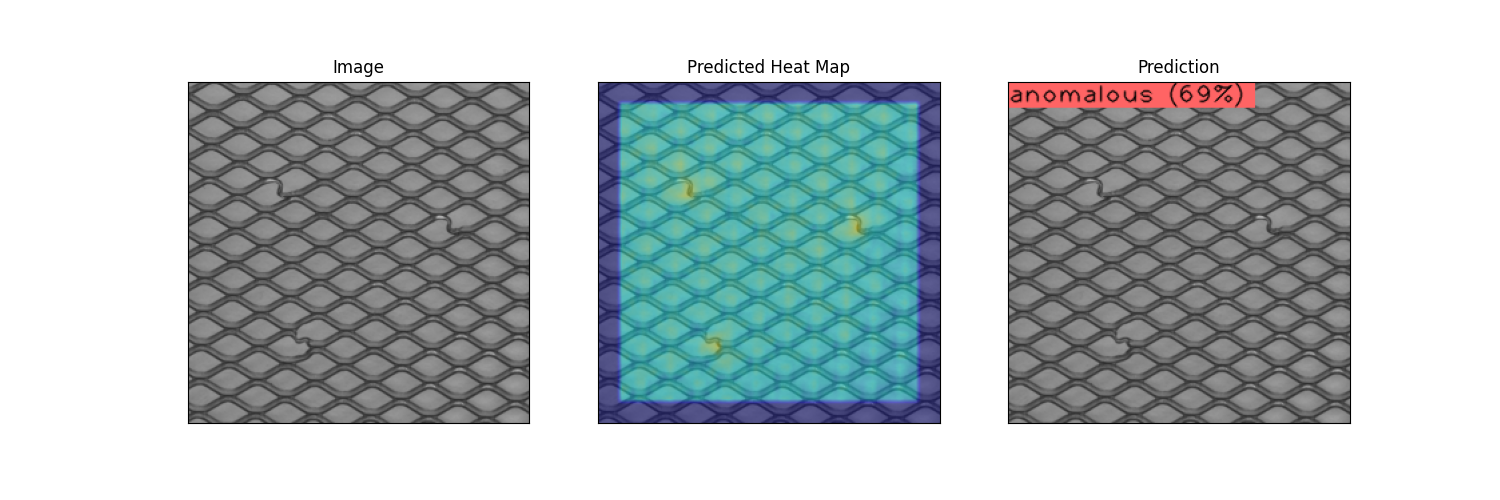

In [27]:
# Example grid image + heatmap + prediction
img = Image.open(
    "results/EfficientAd/MVTec/grid/latest/images/bent/000.png"
)
img.show()

Testing the model for grid. This model got an AUROC score of 0.9566

In [22]:
gengine.test(dataloaders=gdata, model=gmodel)

F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │     0.956558108329773     │
│       image_F1Score       │    0.9345794320106506     │
└───────────────────────────┴───────────────────────────┘

[{'image_AUROC': 0.956558108329773, 'image_F1Score': 0.9345794320106506}]

Fitting the data to the model for leather

In [ ]:
lengine.fit(datamodule=ldata, model=lmodel)

Heatmap that shows what the model sees as anomalous for leather

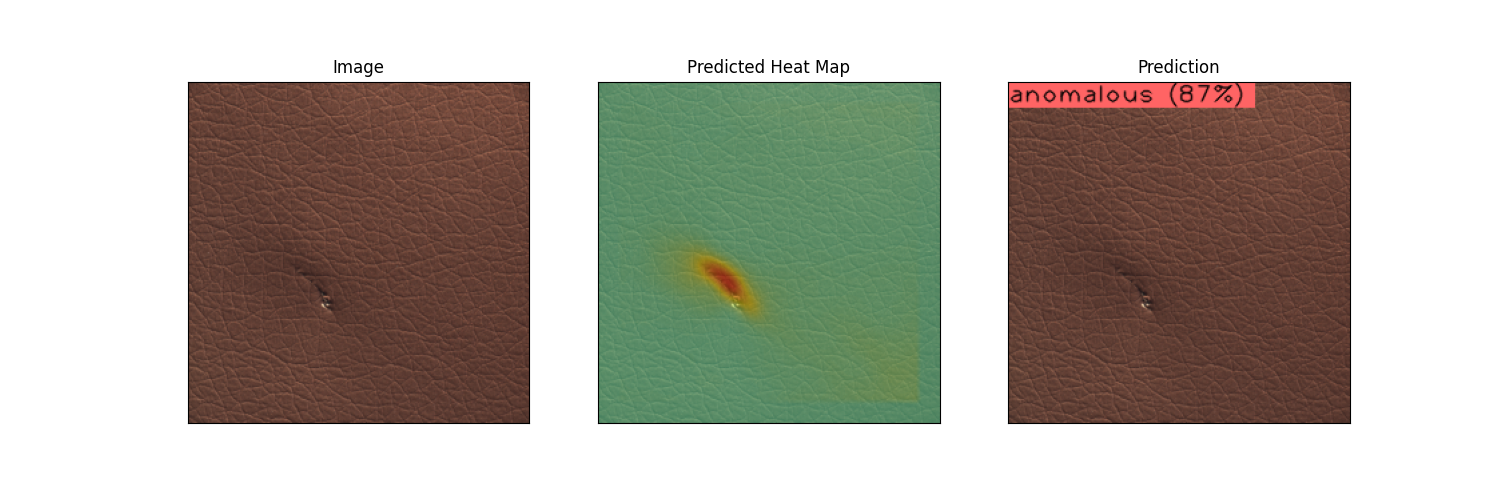

In [ ]:
# Example leather image + heatmap + prediction
img = Image.open(
    "results/EfficientAd/MVTec/leather/latest/images/cut/001.png"
)
img.show()

Testing the model for leather. This model got an AUROC score of 0.8930

In [13]:
lengine.test(dataloaders=ldata, model=lmodel)

F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │    0.8930027484893799     │
│       image_F1Score       │    0.9028571248054504     │
└───────────────────────────┴───────────────────────────┘

[{'image_AUROC': 0.8930027484893799, 'image_F1Score': 0.9028571248054504}]

Fitting data for the tile class

In [ ]:
tengine.fit(datamodule=tdata, model=tmodel)

Another heatmap, but for tile

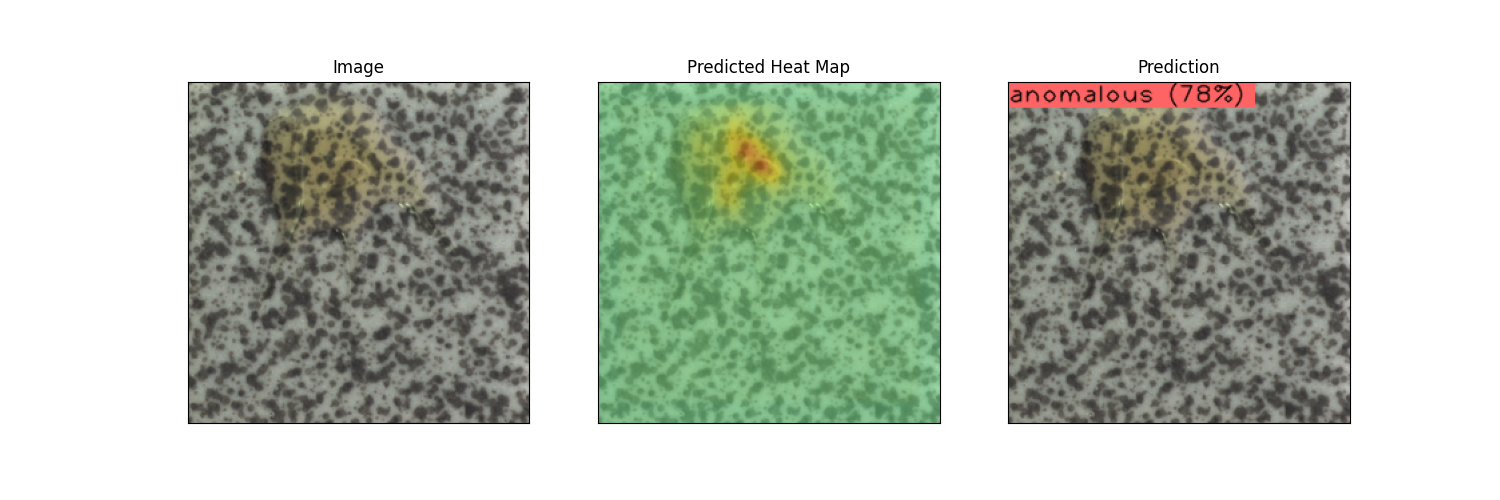

In [ ]:
# Example tile image + heatmap + prediction
img = Image.open(
    "results/EfficientAd/MVTec/tile/latest/images/oil/017.png"
)
img.show()

Testing the model for tile. This model got an AUROC score of 0.9390

In [20]:
tengine.test(datamodule=tdata, model=tmodel)

F1Score class exists for backwards compatibility. It will be removed in v1.1. Please use BinaryF1Score from torchmetrics instead


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        image_AUROC        │    0.9390332698822021     │
│       image_F1Score       │    0.9176470637321472     │
└───────────────────────────┴───────────────────────────┘

[{'image_AUROC': 0.9390332698822021, 'image_F1Score': 0.9176470637321472}]

Overall, across all three categories the average AUROC score was 0.93